In [1]:
import os
os.chdir('/Volumes/RayPass/Research/Abundance')

import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.io import fits
from scipy.stats import norm
%matplotlib inline

plt.rcParams.update({'font.size': 14, 'xtick.minor.visible':True,
                     'ytick.minor.visible':True})
np.random.seed(5749)

# Background - Strong Line Abundances

When determining the oxygen abundance of an HII region or a star-forming galaxy as a whole, the most direct and physically motivated method is to measure the electron temperature ($T_e$) of the ionized gas using the intensity of one or more temperature-sensitive auroral lines such as \[OIII\]$\lambda$4363, \[NII\]$\lambda$5755, \[SIII\]$\lambda$6312, and \[OII\]$\lambda$7325 ([Dinerstein 1990](https://ui.adsabs.harvard.edu/abs/1990ASSL..161..257D/abstract); [Skillman 1998](https://ui.adsabs.harvard.edu/abs/1998salg.conf..457S/abstract); [Stasi&nacute;ska 2007](https://ui.adsabs.harvard.edu/abs/2007arXiv0704.0348S/abstract)). Unfortunately, these auroral lines are intrinsically faint, especially in metal-rich galaxies and star-forming regions. Therefore, when these lines are undetectable or not measured, _strong-line_ abundance calibrations are used to estimate the metallicity of the ionized gas. 

Strong-line abundance calibrations essentially relate the oxygen abundance to one or more line ratios involving the strongest recombination and collisionally excited (forbidden) lines (e.g., \[OII\]$\lambda$3727, H$\alpha$, H$\beta$, \[OIII\]$\lambda\lambda$4959,5007, \[NII\]$\lambda\lambda$6548,6584, and \[SII\]$\lambda\lambda$6716,6731). Strong-line methods are _indirect_ and usually model dependent.

Over the last four decades, numerous strong-line calibrations have been developed, but in general they fall into one of three categories: semi-empirical, empirical, and theoretical. The older, _semi-empirical_ calibrations were generally tied to electron temperature measurements at low metallicites and photoionization models at high metallicities (e.g., [Alloin et al. 1979](https://ui.adsabs.harvard.edu/abs/1979A%26A....78..200A/abstract); [Edmunds & Pagel 1984](https://ui.adsabs.harvard.edu/abs/1984MNRAS.211..507E/abstract); [Dopita & Evans 1986](https://ui.adsabs.harvard.edu/abs/1986ApJ...307..431D/abstract)). These hybrid calibrations were born from the observational difficulty of measuring the electron temperature of metal-rich HII regions. In contrast, the _empirical_ methods are calibrated against high-quality observations of individual HII regions with measured direct (i.e., $T_e$-based) oxygen abundances (e.g., [Pilyugin 2000](https://ui.adsabs.harvard.edu/abs/2000A%26A...362..325P/abstract),[2001](https://ui.adsabs.harvard.edu/abs/2001A%26A...369..594P/abstract); [Pilyugin & Thuan 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...631..231P/abstract); [Peimbert et al. 2007](https://ui.adsabs.harvard.edu/abs/2007RMxAC..29...72P/abstract)). One of the limitations of the empirical calibrations, especially in the metal-rich regime, is that they are based on observations of relatively small samples of high-excitation HII regions, whereas most integrated spectra of galaxies exhibit softer ionizing radiation fields. Finally, the class of _theoretical_ abundance calibrations is based on ab initio photoionization model calculations, in which various nebular emission line ratios are tracked as a function of the input metallicity and ionization parameter (e.g., [McGaugh 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...380..140M/abstract); [Kewley & Dopita 2002](https://ui.adsabs.harvard.edu/abs/2002ApJS..142...35K/abstract)). 

The individual problems with these various calibrations is compounded by the fact that there exist large, poorly understood systematic discrepancies, in the sense that empirical calibrations generally yield oxygen abundances that are factors of 1.5-5 _lower_ than abundances derived using theoretical calibrations ([Kewley & Ellison 2008](https://ui.adsabs.harvard.edu/abs/2008ApJ...681.1183K/abstract)). Unfortunately, the physical origin of this systematic discrepancy remains unsolved. 

Some of the more common strong-line calibrations rely on the metallicity-sensitive $R_{23}$ parameter ([Pagel et al. 1979](https://ui.adsabs.harvard.edu/abs/1979MNRAS.189...95P/abstract)): 

$$R_{23} = \frac{\text{[OII]}\lambda3727 + \text{[OIII]}\lambda\lambda4959,5007}{\text{H}\beta}.$$

The advantage of $R_{23}$ as an oxygen abundance diagnostic is that it is directly proportional to both principal ionization states of oxygen, unlike other diagnostics that have a second-order dependence on the abundance of other elements like nitrogen or sulfur. The disadvantages of $R_{23}$ are that it is sensitive to AGN contamination, and it must be corrected for stellar absorption and dust attenuation. 

An additional complication is that the relation between $R_{23}$ and metallicity is famously double-valued. For example, using the calibration of [McGaugh (1991; M91)](https://ui.adsabs.harvard.edu/abs/1991ApJ...380..140M/abstract), we can see the issue.

(-1.0, 1.5)

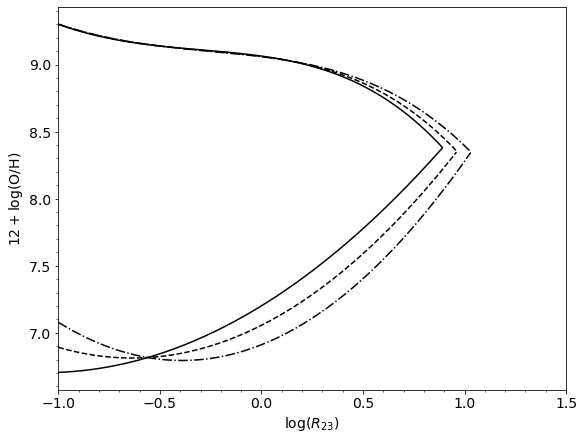

In [2]:
def mcgaugh91_up(logR23,logO32):
    return 12 - 2.939 - 0.2*logR23 - 0.237*logR23**2 - 0.305*logR23**3 - 0.0283*logR23**4 - logO32*(0.0047 - 0.0221*logR23 - 0.102*logR23**2 - 0.0817*logR23**3 - 0.00717*logR23**4)

def mcgaugh91_dw(logR23,logO32):
    return 12 - 4.944 + 0.767*logR23 + 0.602*logR23**2 - logO32*(0.29 + 0.332*logR23 - 0.331*logR23**2)

fig1 = plt.figure(figsize=(8,6), constrained_layout=True)
ax1 = plt.subplot(111)

O32_vals = [-.5, 0, 0.5]
R23_vals = np.arange(-1.0,1.5,0.01)
z_vals = np.arange(6.5,9.5,0.01)
for j,ls in zip(O32_vals,['-','--','-.']):
    idx = np.argwhere(np.diff(np.sign(mcgaugh91_up(R23_vals,j) - mcgaugh91_dw(R23_vals,j)))).flatten()
    ax1.plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_up(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
    ax1.plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_dw(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
ax1.set_xlabel(r'$\log(R_{23})$')
ax1.set_ylabel(r'$12 + \log(\mathrm{O}/\mathrm{H})$')
ax1.set_xlim(-1.0,1.5)



In the above figure, we have the $R_{23}$ parameter on the $x$-axis and the oxygen abundance on the $y$-axis. The M91 calibration accounts for the ionization parameter in the form of $\log(\text{O}_{32})$, where $\text{O}_{32}$ is

$$\text{O}_{32} = \frac{\text{[OIII]}\lambda\lambda4959,5007}{\text{[OII]}\lambda3727},$$

and this characterizes the hardness of the ionizing radiation field; the styled lines indicate different blanket values of this $\text{O}_{32}$ parameter. However, we can see the broader issue. Metal-rich objects lie on the _upper_ $R_{23}$ branch, while metal-poor galaxies and HII regions lie on the _lower_ branch; the transition between the upper and lower $R_{23}$ branches is called the _turn-around_ region. This non-monotonic relation between $R_{23}$ and $12+\log(\text{O}/\text{H})$ arises because in metal-rich star-forming regions, $R_{23}$ decreases with increasing metallicity as the far-infrared fine-structure lines (predominantly \[OIII\]$\lambda 52\mu\text{m}$ and \[OIII\]$\lambda 88\mu\text{m}$) increasingly dominate the nebular cooling. At low metallicity, on the other hand, the optical transitions dominate the nebular cooling, and so $R_{23}$ decreases in tandem with decreasing metallicity because its strength is directly proportional to the abundance of oxygen atoms. 

Because the $R_{23}$-metallicity relation is double-valued, we must take special care when computing the oxygen abundances of objects near the turn-around region, where the upper and lower branches intercept. In particular, objects that are statistically consistent with being on _either_ the upper branch _or_ the lower branch must have correspondingly large abundance errors. In addition, measurement uncertainties or residual AGN contamination occasionally result in an $R_{23}$ parameter that is larger than $\sim$10, the approximate theoretical limit for photoionization by massive stars ([Kewley & Dopita 2002](https://ui.adsabs.harvard.edu/abs/2002ApJS..142...35K/abstract)). Although these objects formally lie "off" the $R_{23}$ calibration, rather than rejecting them outright, which is typically what is done in the literature, it is better to asses whether they are statistically consistent with being _on_ the $R_{23}$ calibration under consideration. 

Here, I am going to illustrate and provide example code for utilizing the method outlined in [Moustakas et al. (2010)](https://ui.adsabs.harvard.edu/abs/2010ApJS..190..233M/abstract) to determine the oxygen abundance of star-forming regions in the spiral galaxy M101 and their associated uncertainties. 

# Background - Monte Carlo

I will refer any interested reader to the detailed example provided by Will Clarkson at the University of Michigan, which you can read by clicking [here](http://www-personal.umd.umich.edu/~wiclarks/AstroLab/HOWTOs/NotebookStuff/MonteCarloHOWTO.html). However, I will summarize a few brief points. 

One of the most important pieces of model-fitting is to determine the "uncertainty" in the value of some parameter in the model. You might have fit some value of your model parameter to data, and it may even go through most of the datapoints and be consistent with your prior expectation on the parameter values. But unless you know what range of values of this parameter are consistent with the data, you really don't know if your model fits at all.

First, a note and some assumptions. 

It is common in the literature to condense the information contained in the deviations from the "best-fit" value to report the "1-sigma" range, often reported as $a \pm s$, where $s$ is the "1-sigma" range. In most cases, this means the range of values that bound 68 percent of the measured values under a large number of experiments. Formally, this practice throws away most of the information the reader might want to know: even under Gaussian measurement errors the posterior distribution of the best-fit parameter can be highly asymmetric and non-Gaussian. Simply reporting one number throws away the true distribution and is not good practice. However, it's the practice most people go with, so we'll try and take the baby before we throw out the bathwater. 

I will additionally make the same assumptions that Will Clarkson made, namely that
1. our model $f(x)$ really does describe the behavior we are measuring, and
2. any deviations between the perfect underlying pattern predicted by $f(x)$ and those we measure, $y(x)$, are due only to measurement error that we can parameterize.

If we were to conduct a large number of identical experiments, then the "true" parameters of our model $f(x)$ would not change, but those are inaccessible to us; the parameters that best describe the data would change a little between experiments because we don't measure exactly the underlying behavior. **The range of best-fit values returned across the set of experiments is then a reasonable estimate for the range in the parameter values allowed by the data.**

Since we cannot do an infinite number of repeat experiments, we need another way to predict what range of parameter values would be returned if we could do them. One way is the formal error-estimate: _if_ the measurement errors all follow the same distribution, and if they are "small enough," then you can use standard error propagation to take the measurement error and propagate it through to get a formal prediction on the error of the parameter. _But_ there's no guarantee that this will work in all cases. What you need in the real world is a method that will empirically find the range of parameters that fit the model to some level of "confidence" without actually doing ten thousand re-runs of the experiment to determine this range. 

This is what Monte Carlo does in this context: **_simulate a large number of fake datasets and find the best-fit parameters using exactly the same method that you're using to fit your real data._** The range of returned parameters under these fake experiments is then a reasonable approximation to the true underlying error in the best-fit parameters. 

# An Example with Real Data

I have at my disposal emission line data for M101 taken from narrowband images of the M101 Group targeting the emission lines of H$\alpha$, H$\beta$, \[OIII\]$\lambda\lambda$4959,5007, and \[OII\]$\lambda$3727. The images were collected using Case Western Reserve University's 24/36-in Burrell Schmidt telescope in Kitt Peak, Arizona. See [Watkins et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017ApJ...851...51W/abstract) and [Garner et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...915...57G/abstract) for an overview of some of the narrowband images and [Mihos et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013ApJ...762...82M/abstract) for an overview of our broadband capabilities. 

Here, the data has been fully cleaned: Galactic extinction and interstellar reddening have been corrected, and line emission has been corrected for stellar Balmer absorption and contamination from \[NII\]$\lambda\lambda$6548,6584 and \[SII\]$\lambda\lambda$6716,6731 emission. 

First, we load in the data, calculate the $R_{23}$ and O$_{32}$ line ratios, and their associated errors.

In [3]:
hdul = fits.open('M101_HII_regions_corrected_photometry.fits.gz') 
M101Data = Table(hdul[1].data)

M101Data['R23'] = (M101Data['O2_nored'] + M101Data['O3_nored'])/M101Data['Hb_nored']
M101Data['R23_err'] = np.abs(M101Data['R23'])*np.sqrt((np.sqrt(M101Data['O3_nored_err']**2 + M101Data['O2_nored_err']**2)/(M101Data['O2_nored']+M101Data['O3_nored']))**2 + (M101Data['Hb_nored_err']/M101Data['Hb_nored'])**2)
M101Data['O32'] = M101Data['O3_nored']/M101Data['O2_nored']
M101Data['O32_err'] = np.abs(M101Data['O32'])*np.sqrt((M101Data['O3_nored_err']/M101Data['O3_nored'])**2 + (M101Data['O2_nored_err']/M101Data['O2_nored'])**2)

Let's take a look at the distribution of the data:

/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


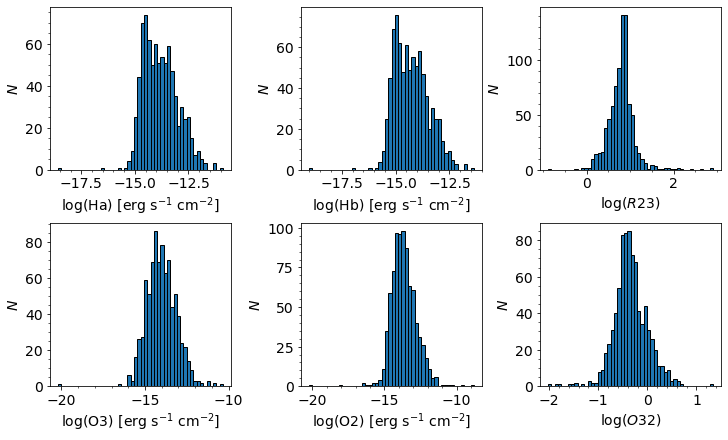

In [4]:
fig2 = plt.figure(figsize=(10,6), constrained_layout=True)
ax2 = fig2.subplot_mosaic(
        """
        abc
        def
        """)

for line, ax in zip(['Ha','Hb','R23','O3','O2','O32'],['a','b','c','d','e','f']):
    if line is 'R23' or line is 'O32':
        ax2[ax].hist(np.log10(M101Data[line]),bins=50,ec='k')
        ax2[ax].set_xlabel(r'$\log({0})$'.format(line))
        ax2[ax].set_ylabel(r'$N$')
    else:
        ax2[ax].hist(np.log10(M101Data[line+'_nored']),bins=50,ec='k')
        ax2[ax].set_xlabel(r'$\log(\mathrm{{{0}}})$ [erg s$^{{-1}}$ cm$^{{-2}}$]'.format(line))
        ax2[ax].set_ylabel(r'$N$')

We see that our line fluxes are across the same range and are somewhat Gaussian. For context, the H$\alpha$ flux tapers off at around $10^{-15}$ erg s$^{-1}$ cm$^{-2}$ which corresponds to a star formation rate of $3 \times 10^{-5}$ M$_\odot$ yr$^{-1}$ ([Hao et al. 2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...741..124H/abstract); [Murphy et al. 2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...737...67M/abstract)). 

We can also do the same for the associated uncertainties: 

/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


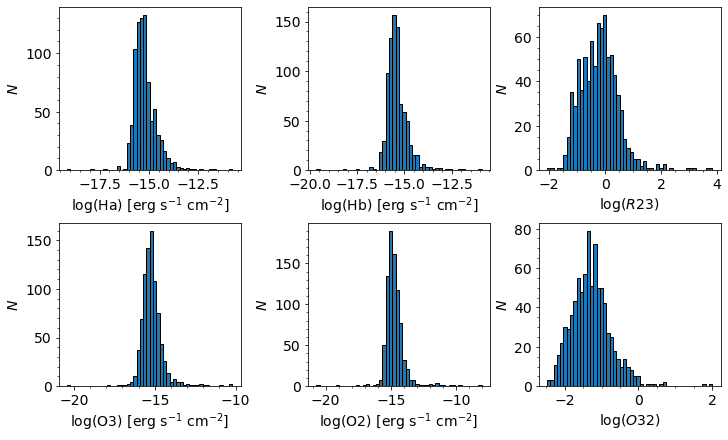

In [5]:
fig3 = plt.figure(figsize=(10,6), constrained_layout=True)
ax3 = fig3.subplot_mosaic(
        """
        abc
        def
        """)

for line, ax in zip(['Ha','Hb','R23','O3','O2','O32'],['a','b','c','d','e','f']):
    if line is 'R23' or line is 'O32':
        ax3[ax].hist(np.log10(M101Data[line+'_err']),bins=50,ec='k')
        ax3[ax].set_xlabel(r'$\log({0})$'.format(line))
        ax3[ax].set_ylabel(r'$N$')
    else:
        ax3[ax].hist(np.log10(M101Data[line+'_nored_err']),bins=50,ec='k')
        ax3[ax].set_xlabel(r'$\log(\mathrm{{{0}}})$ [erg s$^{{-1}}$ cm$^{{-2}}$]'.format(line))
        ax3[ax].set_ylabel(r'$N$')

We see that our O3 and O2 errors are roughly Gaussian, while our H$\alpha$ and H$\beta$ error distributions might be Lorentzian in nature. Notably, the $R_{23}$ and O$_{32}$ errors do appear to be broadly Gaussian in nature. This is all good! 

Now we can plot our $R_{23}$ values against the $R_{23}$-metallicity relation. However, to do that, we need some way of picking which branch a particular HII region lies on. The current recommendations for assigning branches to HII regions is to utilize line ratios with \[NII\] ([Contini et al. 2002](https://ui.adsabs.harvard.edu/abs/2002MNRAS.330...75C/abstract); [Kewley & Ellison 2008](https://ui.adsabs.harvard.edu/abs/2008ApJ...681.1183K/abstract)). In that case, a region is assigned to the lower branch if $\log(\text{[NII]}/\text{H}\alpha) < -1$ and $\log(\text{[NII]}/\text{[OII]} < -1.05$, while regions are assigned to the upper branch if $\log(\text{[NII]}/\text{H}\alpha) > -1$ and $\log(\text{[NII]}/\text{[OII]} > -0.8$. 

However, due to the placement of our narrowband filters, we have no way of measuring the \[NII\] line emission. Therefore, at the suggestion of [Kewley & Dopita (2002)](https://ui.adsabs.harvard.edu/abs/2002ApJS..142...35K/abstract), we use the calibration of [Zaritsky et al. (1994; Z94)](https://ui.adsabs.harvard.edu/abs/1994ApJ...420...87Z/abstract), which does not require an upper/lower branch distinction to be made, to calculate an initial guess of the metallicity. This step is problematic for many reasons: 
1. the Z94 calibration is itself an average of three older theoretical calibrations and will suffer from the same uncertainties in those calibrations; 
2. the Z94 calibration will be very inaccurate at low abundances ($\log(\text{O/H}) + 12 < 8.5$), causing metallicities to be overestimated by a factor of up to 0.5 dex in this range; and
3. the Z94 calibration will preferentially assign most of the $\log(R_{23})$ parameter space to the upper branch, causing spurious artifacts to remain, such as a plateau in the radial abundance gradient (see [Pilyugin 2003](https://ui.adsabs.harvard.edu/abs/2003A%26A...397..109P/abstract) for a discussion).

These problems notwithstanding, we will go ahead and use the Z94 calibration to make our initial guesses as to which branch each HII region belongs. 

/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10


(8.0, 9.25)

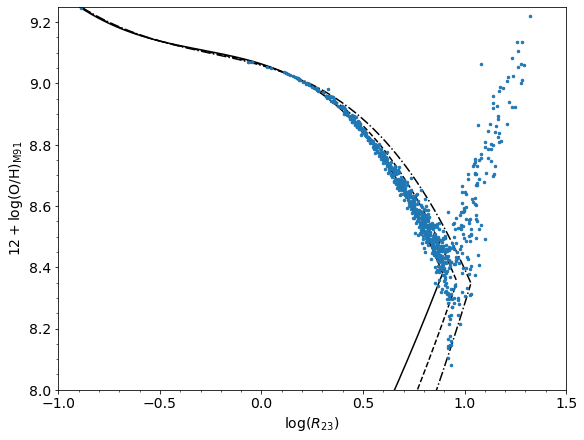

In [6]:
def zaritsky94(log_R23):
    return 9.265 - 0.33*log_R23 - 0.202*log_R23**2 - 0.207*log_R23**3 - 0.333*log_R23**4

def mcgaugh91(logR23,logO32,Z_guess):
    if Z_guess <= 8.4:
        return 12 - 4.944 + 0.767*logR23 + 0.602*logR23**2 - logO32*(0.29 + 0.332*logR23 - 0.331*logR23**2)
    elif Z_guess > 8.4:
        return 12 - 2.939 - 0.2*logR23 - 0.237*logR23**2 - 0.305*logR23**3 - 0.0283*logR23**4 - logO32*(0.0047 - 0.0221*logR23 - 0.102*logR23**2 - 0.0817*logR23**3 - 0.00717*logR23**4)

Z_guess = zaritsky94(np.log10(M101Data['R23']))
Z_real = np.zeros(0)
for i in range(0,len(M101Data)):
    Z = mcgaugh91(np.log10(M101Data[i]['R23']),np.log10(M101Data[i]['O32']),Z_guess[i])
    Z_real = np.append(Z_real,Z)
    
fig4 = plt.figure(figsize=(8,6), constrained_layout=True)
ax4 = plt.subplot(111)

O32_vals = [-.5, 0, 0.5]
R23_vals = np.arange(-1.0,1.3,0.01)
z_vals = np.arange(6.5,9.5,0.01)
for j,ls in zip(O32_vals,['-','--','-.']):
    idx = np.argwhere(np.diff(np.sign(mcgaugh91_up(R23_vals,j) - mcgaugh91_dw(R23_vals,j)))).flatten()
    ax4.plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_up(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
    ax4.plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_dw(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
ax4.plot(np.log10(M101Data['R23']), Z_real, color='C0', marker='.', markersize=5, ls='None')
ax4.set_xlabel(r'$\log(R_{23})$')
ax4.set_ylabel(r'$12 + \log(\mathrm{O/H})_{\mathrm{M91}}$')
ax4.set_xlim(-1,1.5)
ax4.set_ylim(8.0,9.25)



Once again, we have the $R_{23}$ parameter on the $x$-axis and the metallicity on the $y$-axis. The styled lines are the M91 calibration for particular O$_{32}$ values and the blue points are the HII regions in M101. Most of the regions fall on the $R_{23}$ calibration, but there are many regions with $\log(R_{23}) > 1.0$ that fall off of the calibration. Since the calibration is just an equation, it will spit out a number regardless of how unphysical that number is; in this case, the M91 calibration becomes unphysical for $\log(R_{23}) > 1.0$. 

Normally, we would toss these high $R_{23}$-valued regions, and most of the literature does just that. However, you can imagine that if we were to plot the $R_{23}$ error bars as well, some of those "unphysical" regions could conceivable lie on the calibration given the full range of their uncertainties. This is where the Monte Carlo method devised by [Moustakas et al. (2010)](https://ui.adsabs.harvard.edu/abs/2010ApJS..190..233M/abstract) comes in. 

We need to set up a few things first: the number of trials and the combined set of best-fit parameters for all the model parameters (initially empty). 

In [7]:
n = 500
m101_z_up = np.array([]) # an array for the upper branch metallicities
m101_z_dw = np.array([]) # an array for the lower (down) branch metallicities

Now we do the simulations. Each time we need to generate the data as well as pass it through the calibrations, one solution for the upper branch and one solution for the lower branch.

In [8]:
for i in range(n):
    Hb_trial = np.random.normal(M101Data['Hb_nored'],np.abs(M101Data['Hb_nored_err']))
    O2_trial = np.random.normal(M101Data['O2_nored'],np.abs(M101Data['O2_nored_err']))
    O3_trial = np.random.normal(M101Data['O3_nored'],np.abs(M101Data['O3_nored_err']))

    O32_trial = np.log10(O3_trial/O2_trial)
    R23_trial = np.log10((O3_trial + O2_trial)/Hb_trial)
    
    # We use a try/except clause to catch weird regions
    try:
        up = mcgaugh91_up(R23_trial,O32_trial)
    except:
        dumdum = 1
        continue

    try:
        dw = mcgaugh91_dw(R23_trial,O32_trial)
    except:
        dumdum = 1
        continue
    
    # Stack the trial onto the running sample
    if np.size(m101_z_up) < 1:
        m101_z_up = np.copy(up)
    else:
        m101_z_up = np.vstack((m101_z_up, up))

    if np.size(m101_z_dw) < 1:
        m101_z_dw = np.copy(dw)
    else:
        m101_z_dw = np.vstack((m101_z_dw, dw))

/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


A few points to note: 
1. The routine might not always work. A more sophisticated analysis would catch those errors. Here, I'm using Python's "try/except" clause to ignore the bad cases. 
2. In this example, I am starting with an empty array and then stacking on the fit-values only if the fitting routine ran without failing. The "continue" statement stops the routine from dumbly stacking on the last fit-value if the fit failed. I do things this way so that the fitpars array is always the correct size to match the number of correctly-run trials.
3. I am picking random values surrounding each region's values within its uncertainties, assuming a Gaussian distribution within those uncertainties. That may not necessarily be the case, but it will work for our purposes.

Having done all that, let's look at the size of the set of trials: 

In [9]:
print(m101_z_up.shape)
print(m101_z_dw.shape)

(500, 849)
(500, 849)


This shows that all of our 500 trials were successful! Now let's take a look at the distribution:

In [10]:
print('Upper Branch Metallicity: {:.2f} +/- {:.2f}'.format(np.nanmedian(m101_z_up),np.nanstd(m101_z_up)))
print('Lower Branch Metallicity: {:.2f} +/- {:.2f}'.format(np.nanmedian(m101_z_dw),np.nanstd(m101_z_dw)))

Upper Branch Metallicity: 8.54 +/- 1.35
Lower Branch Metallicity: 8.15 +/- 0.55


Now comes the method outlined by Moustakas et al. (2010). You can imagine that there are three possible cases when you look at a particular HII region's upper and lower branch solutions. In the first case, the upper and lower branch solutions are distinct and well-separated, i.e., they are outside of each other's uncertainties. Once the appropriate branch has been chosen, the corresponding metallicity follows. This is easily seen in the left-hand plot below: the upper branch solution (red circle) is above and well-separated from the lower branch solution (blue triangle). The right-hand plot below shows the Monte Carlo distribution of $12 + \log(\text{O/H})$ values corresponding to the solution on the upper (solid red histogram) and lower branch (dashed blue histogram) assuming Gaussian errors on the \[OII\], \[OIII\], and H$\beta$ line flux after 500 trials. Assuming this object belongs on the upper branch, the $1\sigma$ uncertainty on $12 + \log(\text{O/H})$ is given by the width of the solid red histogram. 

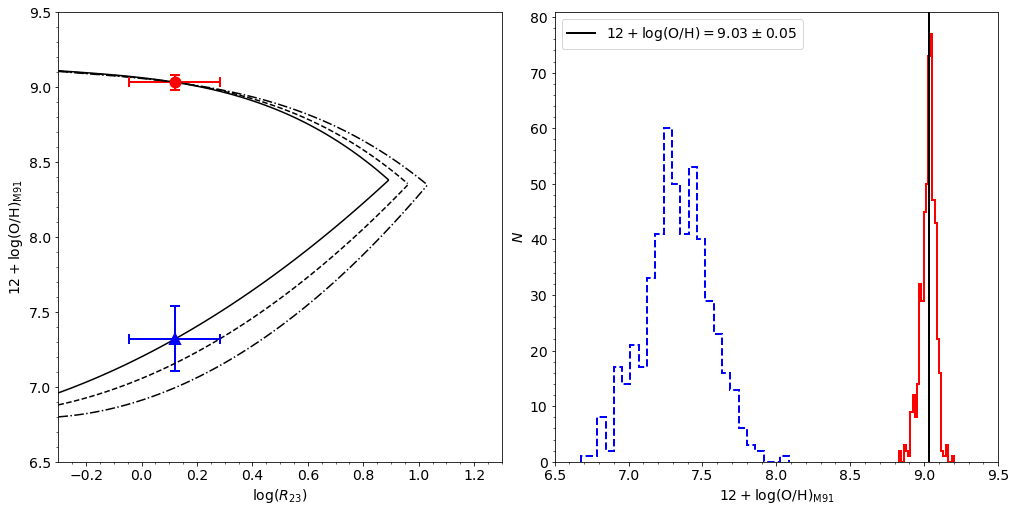

In [11]:
i = 3

fig5 = plt.figure(figsize=(14,7), constrained_layout=True)
ax5 = fig5.subplot_mosaic(
        """
        ab
        """)

# Plot the M91 calibration for particular O32 values
O32_vals = [-.5, 0, 0.5]
R23_vals = np.arange(-0.3,1.3,0.01)
z_vals = np.arange(6.5,9.5,0.01)
for j,ls in zip(O32_vals,['-','--','-.']):
    idx = np.argwhere(np.diff(np.sign(mcgaugh91_up(R23_vals,j) - mcgaugh91_dw(R23_vals,j)))).flatten()
    ax5['a'].plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_up(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
    ax5['a'].plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_dw(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
# Plot the upper branch solution
ax5['a'].errorbar(np.log10(M101Data[i]['R23']), np.nanmedian(m101_z_up[:,i]), 
   xerr = (0.434*M101Data[i]['R23_err'])/M101Data[i]['R23'], 
   yerr = np.nanstd(m101_z_up[:,i]), mec='r', mfc='r', marker='o', markersize=10, ecolor='r', elinewidth=2, 
   capsize = 5, mew=2)
# Plot the lower branch solution
ax5['a'].errorbar(np.log10(M101Data[i]['R23']), np.nanmedian(m101_z_dw[:,i]), 
   xerr = (0.434*M101Data[i]['R23_err'])/M101Data[i]['R23'], 
   yerr = np.nanstd(m101_z_dw[:,i]), mec='b', mfc='b', marker='^', markersize=10, ecolor='b', elinewidth=2, 
   capsize = 5, mew=2)
# Plot the upper and lower branch histograms
ax5['b'].hist(m101_z_up[:,i], bins=25, histtype='step', color='r', ls='-', lw=2)
ax5['b'].hist(m101_z_dw[:,i], bins=25, histtype='step', color='b', ls='--', lw=2)
# Set plot kwargs
ax5['a'].set_xlabel(r'$\log(R_{23})$')
ax5['a'].set_ylabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{\mathrm{M91}}$')
ax5['b'].set_xlabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{\mathrm{M91}}$')
ax5['b'].set_ylabel(r'$N$')
ax5['a'].set_xlim(-0.3,1.3)
ax5['a'].set_ylim(6.5,9.5)
ax5['b'].set_xlim(6.5,9.5)

# If upper branch solution is above lower branch solution
if np.nanmedian(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i]):
    # If they aren't well-separated, i.e., within each other's 1*sigma
    if (np.nanmedian(m101_z_up[:,i]) - np.nanstd(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) + np.nanstd(m101_z_dw[:,i]) > np.nanmedian(m101_z_up[:,i])):
        (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
        (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
        avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
        sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
        ax5['b'].axvline(avg, color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(avg,sig))
        ax5['b'].legend(loc='best')
    # If they are well-separated, let the initial guess decide which branch to use
    else:
        if Z_guess[i] <= 8.4:
            ax5['b'].axvline(np.nanmedian(m101_z_dw[:,i]), color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(np.nanmedian(m101_z_dw[:,i]),np.nanstd(m101_z_dw[:,i])))
            ax5['b'].legend(loc='best')
        else:
            ax5['b'].axvline(np.nanmedian(m101_z_up[:,i]), color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(np.nanmedian(m101_z_up[:,i]),np.nanstd(m101_z_up[:,i])))
            ax5['b'].legend(loc='best')
# If upper branch solution is below lower branch solution
elif np.nanmedian(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i]):
    # If they aren't well-separated, i.e., within each other's 1*sigma
    if (np.nanmedian(m101_z_up[:,i]) + np.nanstd(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) - np.nanstd(m101_z_dw[:,i]) < np.nanmedian(m101_z_up[:,i])):
        (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
        (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
        avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
        sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
        ax5['b'].axvline(avg, color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(avg,sig))
        ax5['b'].legend(loc='best')
    # If they are well-separated, mark it as indeterminant
    else:
        ax5['b'].text(0.05,0.9,'No determination possible', ha='left', va='center', transform=ax5['b'].transAxes)


In the second case, the formal solution on the lower branch is larger than the solution on the upper branch (note that the blue triangle is now above the red circle in the plot on the left below). In the right plot below, the overlapping region of the histograms corresponds to values of $R_{23}$ and O$_{32}$ that lie _on_ the M91 calibration, that is, where $(\text{O/H})_{\text{upper}} > (\text{O/H})_{\text{lower}}$. If the central values of the two distributions are within $1\sigma$ of each other, as measured by the width of the overlapping region, we adopt the average of the two solutions as the oxygen abundance, and the width of the overlapping region as the $1\sigma$ uncertainty. In practice, these types of regions all have M91 abundances equal to the abundance around the turn-around region, $\approx 8.4$ dex; however, they also have large abundance errors, which reflects this ambiguity in picking a branch. 

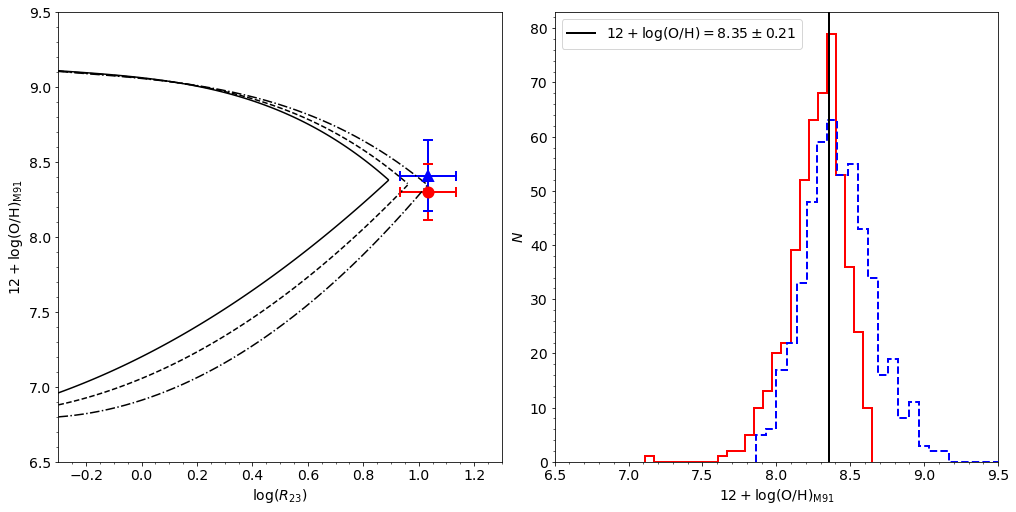

In [12]:
i = 9

fig5 = plt.figure(figsize=(14,7), constrained_layout=True)
ax5 = fig5.subplot_mosaic(
        """
        ab
        """)

# Plot the M91 calibration for particular O32 values
O32_vals = [-.5, 0, 0.5]
R23_vals = np.arange(-0.3,1.3,0.01)
z_vals = np.arange(6.5,9.5,0.01)
for j,ls in zip(O32_vals,['-','--','-.']):
    idx = np.argwhere(np.diff(np.sign(mcgaugh91_up(R23_vals,j) - mcgaugh91_dw(R23_vals,j)))).flatten()
    ax5['a'].plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_up(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
    ax5['a'].plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_dw(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
# Plot the upper branch solution
ax5['a'].errorbar(np.log10(M101Data[i]['R23']), np.nanmedian(m101_z_up[:,i]), 
   xerr = (0.434*M101Data[i]['R23_err'])/M101Data[i]['R23'], 
   yerr = np.nanstd(m101_z_up[:,i]), mec='r', mfc='r', marker='o', markersize=10, ecolor='r', elinewidth=2, 
   capsize = 5, mew=2)
# Plot the lower branch solution
ax5['a'].errorbar(np.log10(M101Data[i]['R23']), np.nanmedian(m101_z_dw[:,i]), 
   xerr = (0.434*M101Data[i]['R23_err'])/M101Data[i]['R23'], 
   yerr = np.nanstd(m101_z_dw[:,i]), mec='b', mfc='b', marker='^', markersize=10, ecolor='b', elinewidth=2, 
   capsize = 5, mew=2)
# Plot the upper and lower branch histograms
ax5['b'].hist(m101_z_up[:,i], bins=25, histtype='step', color='r', ls='-', lw=2)
ax5['b'].hist(m101_z_dw[:,i], bins=25, histtype='step', color='b', ls='--', lw=2)
# Set plot kwargs
ax5['a'].set_xlabel(r'$\log(R_{23})$')
ax5['a'].set_ylabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{\mathrm{M91}}$')
ax5['b'].set_xlabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{\mathrm{M91}}$')
ax5['b'].set_ylabel(r'$N$')
ax5['a'].set_xlim(-0.3,1.3)
ax5['a'].set_ylim(6.5,9.5)
ax5['b'].set_xlim(6.5,9.5)

# If upper branch solution is above lower branch solution
if np.nanmedian(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i]):
    # If they aren't well-separated, i.e., within each other's 1*sigma
    if (np.nanmedian(m101_z_up[:,i]) - np.nanstd(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) + np.nanstd(m101_z_dw[:,i]) > np.nanmedian(m101_z_up[:,i])):
        (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
        (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
        avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
        sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
        ax5['b'].axvline(avg, color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(avg,sig))
        ax5['b'].legend(loc='best')
    # If they are well-separated, let the initial guess decide which branch to use
    else:
        if Z_guess[i] <= 8.4:
            ax5['b'].axvline(np.nanmedian(m101_z_dw[:,i]), color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(np.nanmedian(m101_z_dw[:,i]),np.nanstd(m101_z_dw[:,i])))
            ax5['b'].legend(loc='best')
        else:
            ax5['b'].axvline(np.nanmedian(m101_z_up[:,i]), color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(np.nanmedian(m101_z_up[:,i]),np.nanstd(m101_z_up[:,i])))
            ax5['b'].legend(loc='best')
# If upper branch solution is below lower branch solution
elif np.nanmedian(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i]):
    # If they aren't well-separated, i.e., within each other's 1*sigma
    if (np.nanmedian(m101_z_up[:,i]) + np.nanstd(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) - np.nanstd(m101_z_dw[:,i]) < np.nanmedian(m101_z_up[:,i])):
        (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
        (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
        avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
        sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
        ax5['b'].axvline(avg, color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(avg,sig))
        ax5['b'].legend(loc='best')
    # If they are well-separated, mark it as indeterminant
    else:
        ax5['b'].text(0.05,0.9,'No determination possible', ha='left', va='center', transform=ax5['b'].transAxes)


Finally, the third case is where no oxygen abundance measurement is possible using the M91 calibration. Here, the upper and lower branch solutions are statistically inconsistent with each other, given the measurement uncertainties; therefore no solution exists, and these objects must be rejected.

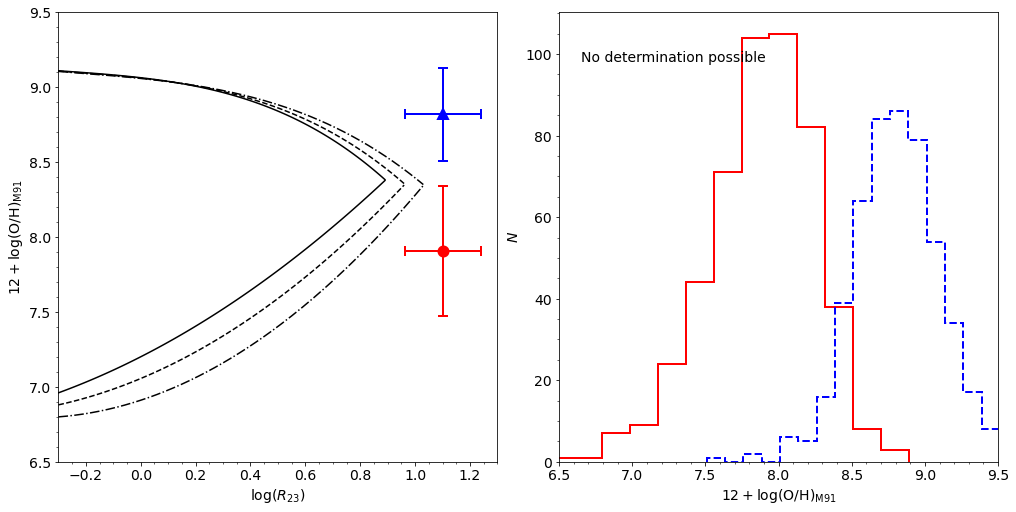

In [13]:
i = 85

fig5 = plt.figure(figsize=(14,7), constrained_layout=True)
ax5 = fig5.subplot_mosaic(
        """
        ab
        """)

# Plot the M91 calibration for particular O32 values
O32_vals = [-.5, 0, 0.5]
R23_vals = np.arange(-0.3,1.3,0.01)
z_vals = np.arange(6.5,9.5,0.01)
for j,ls in zip(O32_vals,['-','--','-.']):
    idx = np.argwhere(np.diff(np.sign(mcgaugh91_up(R23_vals,j) - mcgaugh91_dw(R23_vals,j)))).flatten()
    ax5['a'].plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_up(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
    ax5['a'].plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_dw(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
# Plot the upper branch solution
ax5['a'].errorbar(np.log10(M101Data[i]['R23']), np.nanmedian(m101_z_up[:,i]), 
   xerr = (0.434*M101Data[i]['R23_err'])/M101Data[i]['R23'], 
   yerr = np.nanstd(m101_z_up[:,i]), mec='r', mfc='r', marker='o', markersize=10, ecolor='r', elinewidth=2, 
   capsize = 5, mew=2)
# Plot the lower branch solution
ax5['a'].errorbar(np.log10(M101Data[i]['R23']), np.nanmedian(m101_z_dw[:,i]), 
   xerr = (0.434*M101Data[i]['R23_err'])/M101Data[i]['R23'], 
   yerr = np.nanstd(m101_z_dw[:,i]), mec='b', mfc='b', marker='^', markersize=10, ecolor='b', elinewidth=2, 
   capsize = 5, mew=2)
# Plot the upper and lower branch histograms
ax5['b'].hist(m101_z_up[:,i], bins=25, histtype='step', color='r', ls='-', lw=2)
ax5['b'].hist(m101_z_dw[:,i], bins=25, histtype='step', color='b', ls='--', lw=2)
# Set plot kwargs
ax5['a'].set_xlabel(r'$\log(R_{23})$')
ax5['a'].set_ylabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{\mathrm{M91}}$')
ax5['b'].set_xlabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{\mathrm{M91}}$')
ax5['b'].set_ylabel(r'$N$')
ax5['a'].set_xlim(-0.3,1.3)
ax5['a'].set_ylim(6.5,9.5)
ax5['b'].set_xlim(6.5,9.5)

# If upper branch solution is above lower branch solution
if np.nanmedian(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i]):
    # If they aren't well-separated, i.e., within each other's 1*sigma
    if (np.nanmedian(m101_z_up[:,i]) - np.nanstd(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) + np.nanstd(m101_z_dw[:,i]) > np.nanmedian(m101_z_up[:,i])):
        (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
        (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
        avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
        sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
        ax5['b'].axvline(avg, color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(avg,sig))
        ax5['b'].legend(loc='best')
    # If they are well-separated, let the initial guess decide which branch to use
    else:
        if Z_guess[i] <= 8.4:
            ax5['b'].axvline(np.nanmedian(m101_z_dw[:,i]), color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(np.nanmedian(m101_z_dw[:,i]),np.nanstd(m101_z_dw[:,i])))
            ax5['b'].legend(loc='best')
        else:
            ax5['b'].axvline(np.nanmedian(m101_z_up[:,i]), color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(np.nanmedian(m101_z_up[:,i]),np.nanstd(m101_z_up[:,i])))
            ax5['b'].legend(loc='best')
# If upper branch solution is below lower branch solution
elif np.nanmedian(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i]):
    # If they aren't well-separated, i.e., within each other's 1*sigma
    if (np.nanmedian(m101_z_up[:,i]) + np.nanstd(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) - np.nanstd(m101_z_dw[:,i]) < np.nanmedian(m101_z_up[:,i])):
        (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
        (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
        avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
        sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
        ax5['b'].axvline(avg, color='k', ls='-', lw=2, label=r'$12 + \log(\mathrm{{O}}/\mathrm{{H}}) = {:.2f} \pm {:.2f}$'.format(avg,sig))
        ax5['b'].legend(loc='best')
    # If they are well-separated, mark it as indeterminant
    else:
        ax5['b'].text(0.05,0.9,'No determination possible', ha='left', va='center', transform=ax5['b'].transAxes)


Now, we can write a code that doesn't just plot this, but saves the determined (or undetermined) value for each region as a new column in our DataFrame. 

In [14]:
M91 = np.zeros(0)
M91_err = np.zeros(0)
Z_guess = zaritsky94(np.log10(M101Data['R23']))
for i in range(0,len(M101Data)):    
    if np.nanmedian(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i]):
        if (np.nanmedian(m101_z_up[:,i]) - np.nanstd(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) + np.nanstd(m101_z_dw[:,i]) > np.nanmedian(m101_z_up[:,i])):
            (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
            (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
            avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
            sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
            M91 = np.append(M91,avg)
            M91_err = np.append(M91_err,sig)
        else:
            if Z_guess[i] <= 8.4:
                M91 = np.append(M91,np.nanmedian(m101_z_dw[:,i]))
                M91_err = np.append(M91_err,np.nanstd(m101_z_dw[:,i]))
            else:
                M91 = np.append(M91,np.nanmedian(m101_z_up[:,i]))
                M91_err = np.append(M91_err,np.nanstd(m101_z_up[:,i]))
    elif np.nanmedian(m101_z_up[:,i]) < np.nanmedian(m101_z_dw[:,i]):
        if (np.nanmedian(m101_z_up[:,i]) + np.nanstd(m101_z_up[:,i]) > np.nanmedian(m101_z_dw[:,i])) and (np.nanmedian(m101_z_dw[:,i]) - np.nanstd(m101_z_dw[:,i]) < np.nanmedian(m101_z_up[:,i])):
            (mu1, sig1) = norm.fit(m101_z_up[:,i][~np.isnan(m101_z_up[:,i])])
            (mu2, sig2) = norm.fit(m101_z_dw[:,i][~np.isnan(m101_z_dw[:,i])])
            avg = np.nanmean([np.nanmedian(m101_z_up[:,i]), np.nanmedian(m101_z_dw[:,i])])
            sig = np.nanmedian([np.nanstd(m101_z_up[:,i]),np.nanstd(m101_z_dw[:,i])])
            M91 = np.append(M91,avg)
            M91_err = np.append(M91_err,sig)
        else:
            M91 = np.append(M91,np.nan)
            M91_err = np.append(M91_err,np.nan)
    else:
        M91 = np.append(M91, np.nan)
        M91_err = np.append(M91_err, np.nan)

M101Data['M91'] = M91
M101Data['M91_err'] = M91_err

/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/crg56/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Let's take a look at the $R_{23}$-metallicity relation once more to see how we've faired.

/Users/crg56/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


(8.0, 9.25)

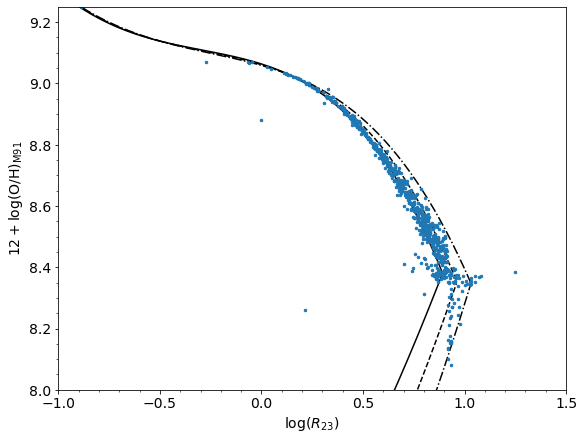

In [15]:
fig4 = plt.figure(figsize=(8,6), constrained_layout=True)
ax4 = plt.subplot(111)

O32_vals = [-.5, 0, 0.5]
R23_vals = np.arange(-1.0,1.3,0.01)
z_vals = np.arange(6.5,9.5,0.01)
for j,ls in zip(O32_vals,['-','--','-.']):
    idx = np.argwhere(np.diff(np.sign(mcgaugh91_up(R23_vals,j) - mcgaugh91_dw(R23_vals,j)))).flatten()
    ax4.plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_up(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
    ax4.plot(R23_vals[R23_vals <= R23_vals[idx]], mcgaugh91_dw(R23_vals[R23_vals <= R23_vals[idx]],j), 'k', ls=ls)
ax4.plot(np.log10(M101Data['R23']), M101Data['M91'], color='C0', marker='.', markersize=5, ls='None')
ax4.set_xlabel(r'$\log(R_{23})$')
ax4.set_ylabel(r'$12 + \log(\mathrm{O/H})_{\mathrm{M91}}$')
ax4.set_xlim(-1,1.5)
ax4.set_ylim(8.0,9.25)

Comparing this plot to the one we made before, we have now removed the "unphysical" regions that did not fall on the calibration even within their uncertainties. There are four outliers which will require further investigation to determine whether they are realistic or not. Another feature we notice now is a line of points at about $12 + \log(\text{O/H}) \sim 8.4$. These are points in the turn-around region that have been "pushed" to the turn-around region metallicity. While this appears bad and might be a downside to the calibration procedure, remember that those points will have relatively higher uncertainties associated with them. When plotting a radial gradient, for instance, any line fitter that can take into account uncertainties should not be weighed heavily by these points. 

# Conclusions

Using Monte Carlo and the methodology outlined by Moustakas et al. (2010), I have hopefully illustrated its usefulness in robustly determining metallicities. This method allows for a straightforward calculation of realistic uncertainties on the abundance as determined by strong-line methods. Obviously, this method will still suffer from the known problems associated with strong-line abundance determinations, but we will be able to state our uncertainties in a more statistical sense. Additionally, although not illustrated here, this can be applied to any strong-line calibration using the $R_{23}$ parameter, not just M91. 

As always, let me know if you spot any errors in my code or the logic behind this method! 